In [196]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
import scipy.io as sio
import numpy as np
import scipy
import os
import warnings
import pandas as pd
import glob
import pickle
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

In [198]:
pathes = glob.glob(os.path.join('..', 'data', 'processed_data','*'))
frames = list()

for path in pathes:
    file_path =os.path.join(path, 'all_data.pkl')
    frames.append(pd.read_pickle(file_path))

ripples = pd.concat(frames, ignore_index=True)
length = [len(frame) for frame in frames]

300


<IPython.core.display.Javascript object>


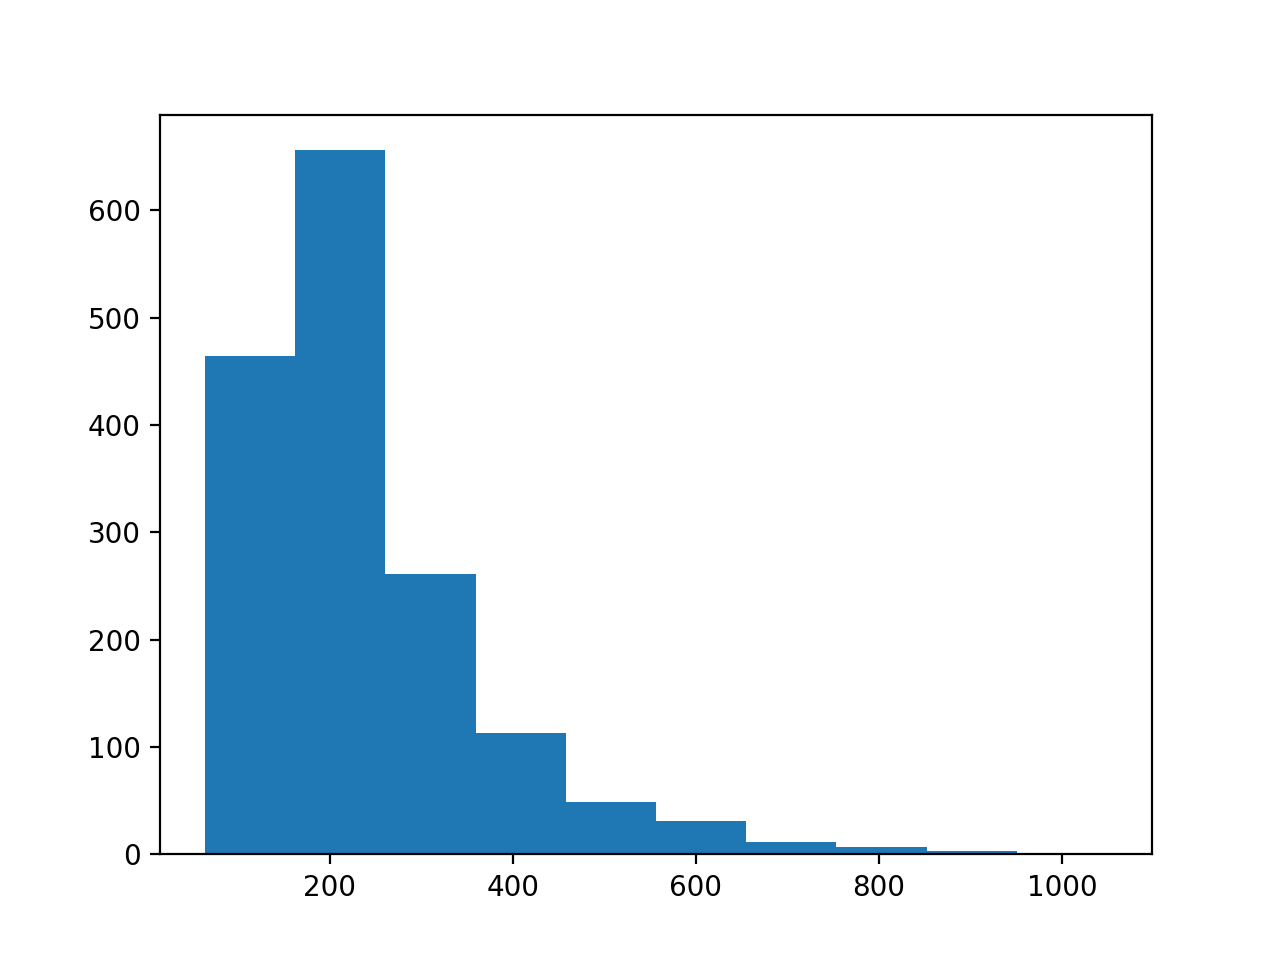

In [199]:
max_duration = ripples.loc[i,'time'].shape[0]

print(max_duration)
ripple_length = 550

plt.figure()
plt.hist(ripples.duration_index)
plt.show()

In [200]:
#Centering

ripples['lfp'] = ripples.apply(lambda row: row['lfp']-row['lfp'].mean(), axis=1)


#Zero padding

# ripples['lfp'] = ripples.apply(lambda row: np.pad(row['lfp'], ((0,int(max_duration-row['lfp'].shape[0])), (0,0)), 'constant', constant_values=0), axis=1)

0.0


<IPython.core.display.Javascript object>


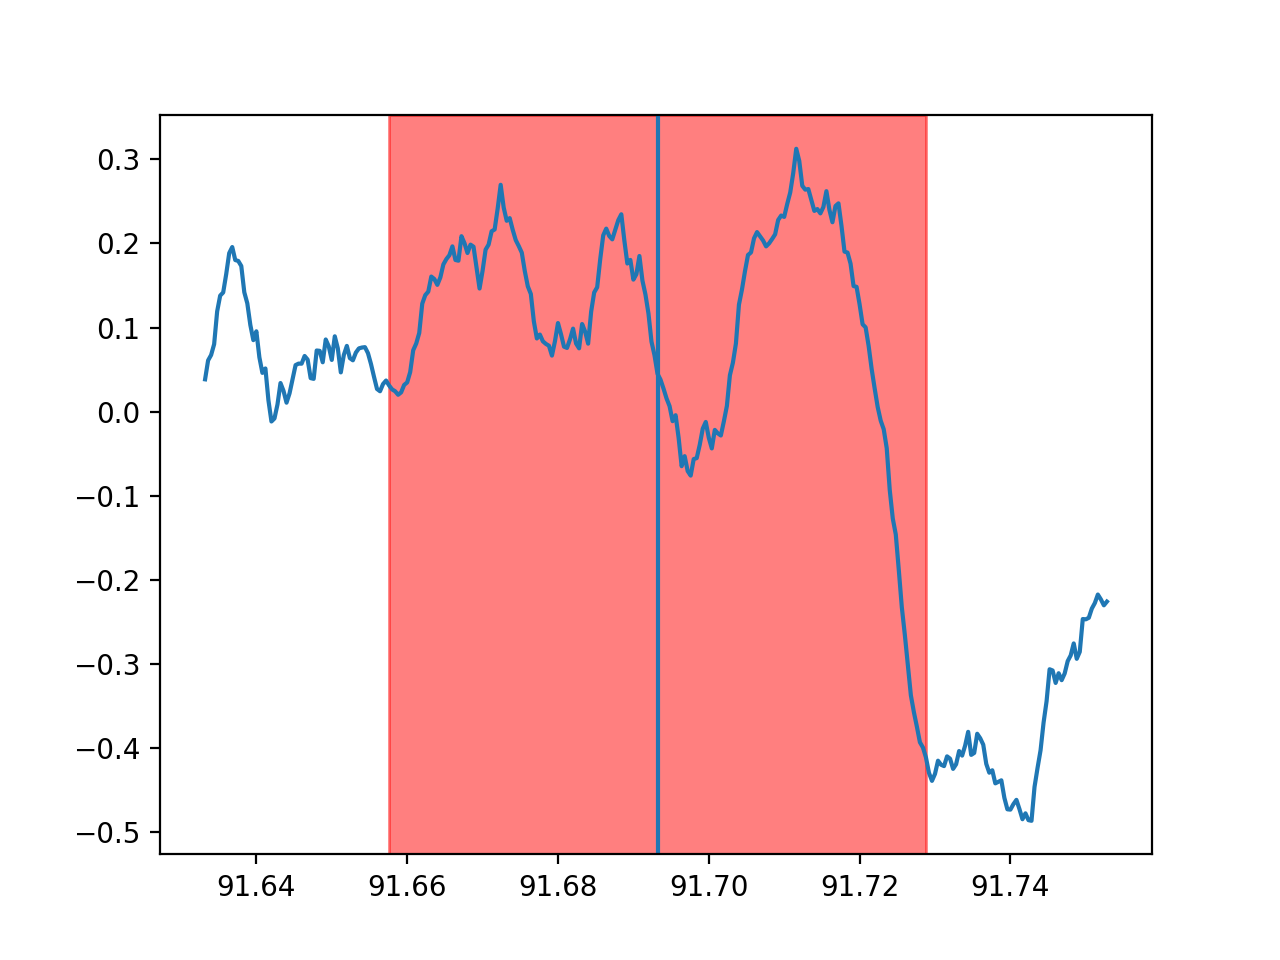

[]

In [201]:
i=50

print(ripples.loc[i,'labels'])

plt.figure()
plt.plot(ripples.loc[i,'time'], ripples.loc[i,'lfp'].flatten())
plt.axvline(x=ripples.loc[i,'center'])
plt.axvspan(ripples.loc[i,'start_time'], ripples.loc[i,'end_time'], alpha=0.5, color='red')
plt.plot()

In [202]:
X = np.zeros((len(ripples), int(max_duration), 1))
y = np.zeros((len(ripples)))

In [203]:
lfp = np.array(ripples.lfp)
labels = np.array(ripples.labels)

for i in range(len(lfp)):
    duration = lfp[i].shape[0]
    X[i,:duration,:] = lfp[i][:duration,:]
    y[i] = labels[i]

In [204]:
directory = os.path.join('..', 'data', 'final_data')

if not os.path.exists(directory):
    os.makedirs(directory)

length_cum = np.cumsum(length)
    
np.save(os.path.join(directory, 'X_train.npy'), X[:length_cum[3],:, :])
np.save(os.path.join(directory, 'y_train.npy'), y[:length_cum[3]])

np.save(os.path.join(directory, 'X_test.npy'), X[length_cum[3]:,:, :])
np.save(os.path.join(directory, 'y_test.npy'), y[length_cum[3]:])


# np.save(os.path.join(directory, 'X_test.npy'), X[:length_cum[0],:, :])
# np.save(os.path.join(directory, 'y_test.npy'), y[:length_cum[0]])

# np.save(os.path.join(directory, 'X_train.npy'), X[length_cum[0]:,:, :])
# np.save(os.path.join(directory, 'y_train.npy'), y[length_cum[0]:])

np.save(os.path.join(directory, 'X.npy'), X)
np.save(os.path.join(directory, 'y.npy'), y)

In [205]:
X = np.zeros((len(ripples), int(max_duration), 1))

In [206]:
X.shape

(1597, 300, 1)

In [207]:
ripples.loc[5,'lfp'].shape

(300, 1)

In [208]:
X[length[-1]:,:, :].shape, X[:-length[-1],:, :].shape

((1205, 300, 1), (1205, 300, 1))

In [209]:
length

[242, 359, 289, 315, 392]

In [210]:
x = np.arange(10)

In [211]:
x[-2:]

array([8, 9])

In [212]:
length_cum

array([ 242,  601,  890, 1205, 1597])